1. Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

2. Load fataset

In [4]:
df = pd.read_csv("/content/archive.zip")
print(df)

      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                         

3. Seperate feature and target

In [5]:
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

4.  Standardize features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 5. Train-test split (80/20)




In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

6. Apply SMOTE to balance classes:
We will apply smote to see if it gives us more accurate than random under sampling.

In [8]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


7. Check new class distribution

In [9]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Bankrupt?
0    5279
1     176
Name: count, dtype: int64
After SMOTE: Bankrupt?
0    5279
1    5279
Name: count, dtype: int64


**After applying smote class distribution is balanced.**

**Model training**

**1. Logistic Regression (Baseline Model)**

1. Insert libraries

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

2. Initialize and train model

In [11]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

3. Predictions

In [12]:
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

4. Evaluation

In [13]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.8922287390029325
Precision: 0.2023121387283237
Recall: 0.7954545454545454
F1 Score: 0.3225806451612903
AUC-ROC: 0.9147727272727273
Confusion Matrix:
 [[1182  138]
 [   9   35]]


**2. Random Forest (Non-linear Model)**

1. Importing Libraries

In [14]:
from sklearn.ensemble import RandomForestClassifier

2. Initialize and train model

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

3. Predictions

In [16]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

4. Evaluation

In [17]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9618768328445748
Precision: 0.43548387096774194
Recall: 0.6136363636363636
F1 Score: 0.5094339622641509
AUC-ROC: 0.9373880853994491
Confusion Matrix:
 [[1285   35]
 [  17   27]]


**3. XGBoost (Gradient Boosted Model)**

1. Importing libraries

In [18]:
from xgboost import XGBClassifier

2. Initialize and train model

In [19]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:57:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

3. Predictions

In [20]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

4.Evaluation

In [21]:
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.966275659824047
Precision: 0.4791666666666667
Recall: 0.5227272727272727
F1 Score: 0.5
AUC-ROC: 0.9491219008264463
Confusion Matrix:
 [[1295   25]
 [  21   23]]


4. **Roc Curves for better understanding**

1. Importing libraries

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


2. Calculate ROC curve values

In [23]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)


3. Calculate AUC

In [24]:
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

4. Plot ROC curves

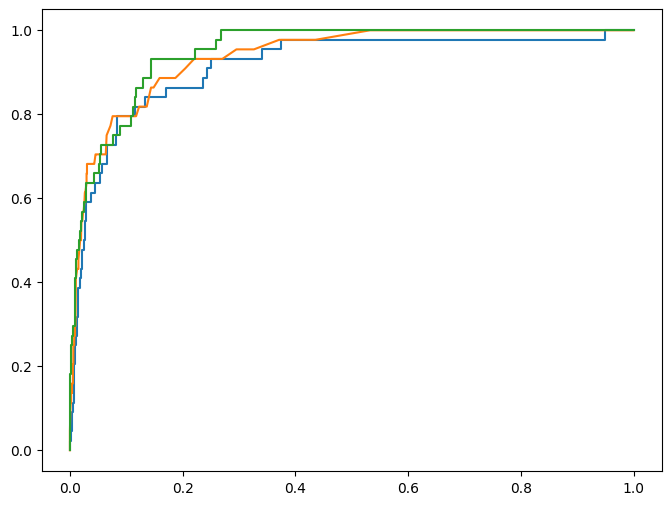

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')


5. Random guessing line

/tmp/ipython-input-157065711.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


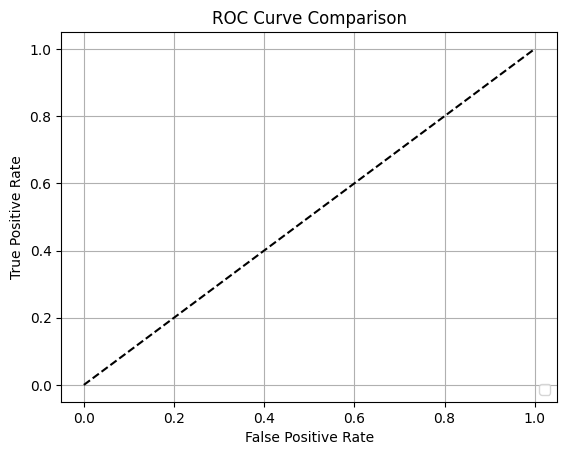

In [26]:
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**5. Feature importance analysis**

**A. Random Forest**

1. Importing libraries

In [27]:
import pandas as pd
import numpy as np

2. Get feature importances from Random Forest

In [28]:
rf_importances = rf.feature_importances_

3. Create a dataframe for better visualization

In [29]:
rf_feature_importance = pd.DataFrame({
    'Feature': df.drop(columns=['Bankrupt?']).columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

print(rf_feature_importance.head(10))

                                     Feature  Importance
39                      Borrowing dependency    0.083886
90                       Liability to Equity    0.051615
85                Net Income to Total Assets    0.050565
36                              Debt ratio %    0.042066
18   Persistent EPS in the Last Four Seasons    0.041178
9       Continuous interest rate (after tax)    0.040066
7                After-tax net Interest Rate    0.038034
89        Net Income to Stockholder's Equity    0.033305
37                          Net worth/Assets    0.032316
67         Retained Earnings to Total Assets    0.028188


**B. XGBoost**

1. Get feature importances from XGBoost

In [30]:
xgb_importances = xgb.feature_importances_

2. Create a dataframe

In [31]:
xgb_feature_importance = pd.DataFrame({
    'Feature': df.drop(columns=['Bankrupt?']).columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

print(xgb_feature_importance.head(10))

                                              Feature  Importance
39                               Borrowing dependency    0.233128
18            Persistent EPS in the Last Four Seasons    0.080226
9                Continuous interest rate (after tax)    0.068055
85                         Net Income to Total Assets    0.042599
8         Non-industry income and expenditure/revenue    0.028331
0    ROA(C) before interest and depreciation befor...    0.024962
20                         Revenue Per Share (Yuan ¥)    0.022371
91                 Degree of Financial Leverage (DFL)    0.020703
35                         Total debt/Total net worth    0.019371
45                       Accounts Receivable Turnover    0.015881


**3. Plotting Feature Importance (Bar Chart)**

1. Importing Libraries

In [32]:
import matplotlib.pyplot as plt


2. Plot Random Forest

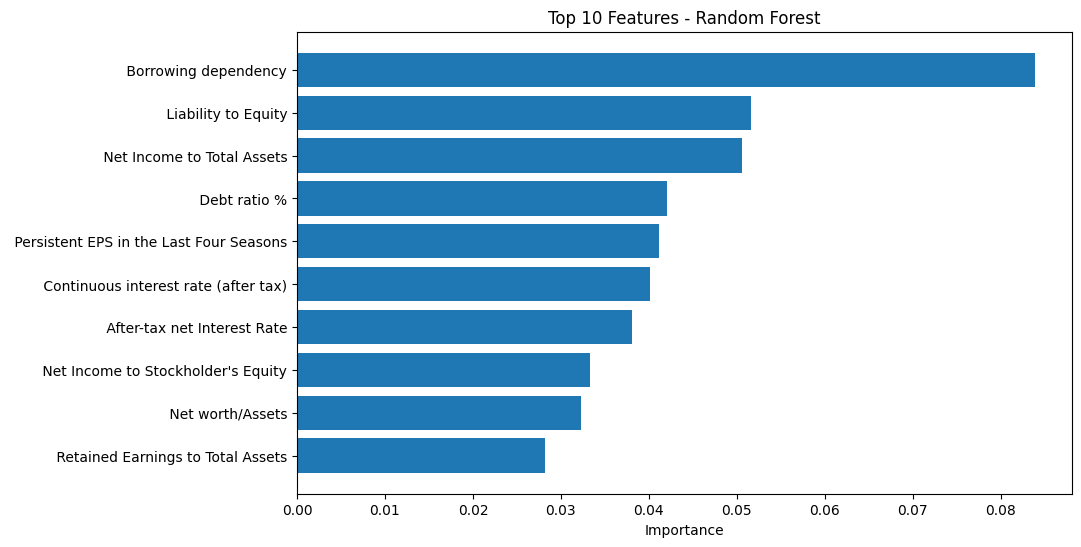

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'][:10], rf_feature_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Features - Random Forest')
plt.xlabel('Importance')
plt.show()


3. Plot XGBoost

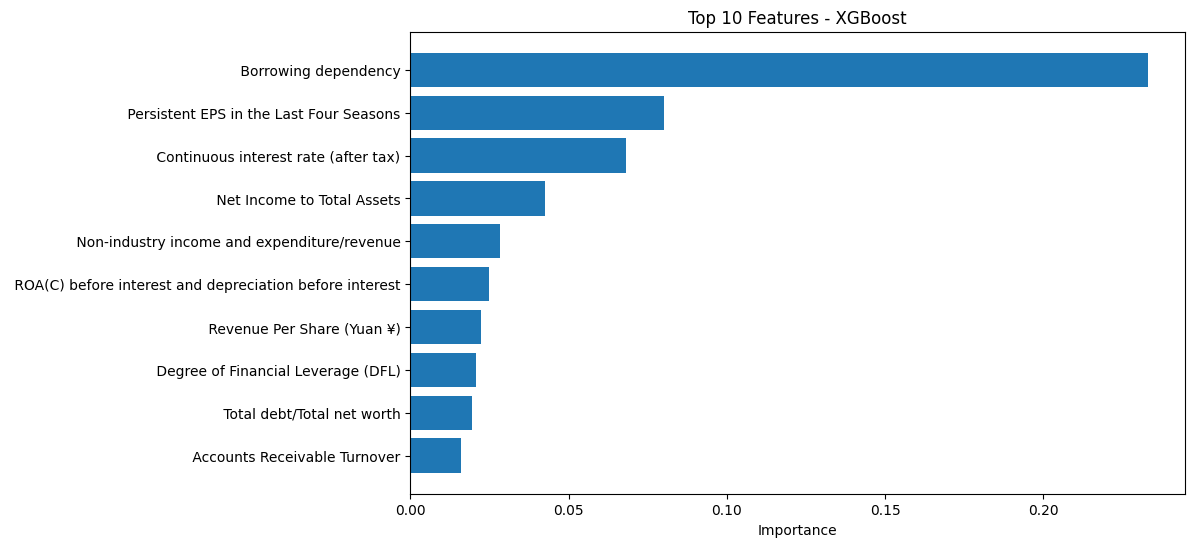

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance['Feature'][:10], xgb_feature_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Features - XGBoost')
plt.xlabel('Importance')
plt.show()

**The model highlights liquidity and leverage ratios as the strongest predictors of financial distress.**